# OpenEO Platform - EODC Forum 2021
### Live Demo
<img src="../data/images/openEO-platform.png"
     alt="OpenEO Platform logo"
     style="width: 900px;" />

In [25]:
from eo_utils import *
## It already includes all te necessary libraries like
# import openeo
# import xarray as xr
# import numpy as np
# etc...

# Create a connection to openEO

It all starts with creating a connection to the desired openEO backend as follows:

In [2]:
con = openeo.connect("https://openeo.vito.be")
con

<Connection to 'https://openeo.vito.be/openeo/1.0/' with NullAuth>

Using this `Connection` object, we can list available data collections and inspect other metadata.

In [3]:
con.list_collections()

[{'description': 'Sentinel 1 GRD Sigma0, mosaic of all ascending relative orbits. Backscatter values are provided as natural number, not in decibel. Provided by Terrascope.\n\n Use [this viewer](https://viewer.terrascope.be/?language=en&bbox=2.8531494643539195,50.29627033037724,6.36877446435392,51.454777120718546&overlay=true&bgLayer=Satellite&date=2020-10-15&layer=CGS_S1_GRD_SIGMA0) to explore the data.',
  'extent': {'spatial': {'bbox': [[-180, -56, 180, 83]]},
   'temporal': {'interval': [['2015-07-06T00:00:00Z', None]]}},
  'id': 'S1_GRD_SIGMA0_ASCENDING',
  'license': 'free',
  'links': [{'href': 'https://docs.terrascope.be/#/DataProducts/Sentinel-1/ProductsOverview',
    'rel': 'alternate',
    'title': 'Product web page.'}],
  'providers': [{'name': 'Terrascope/VITO'}],
  'stac_extensions': ['datacube'],
  'stac_version': '0.9.0',
  'title': 'Sentinel 1 GRD Sigma0 product, VH, VV and angle.'},
 {'description': 'Sentinel 1 GRD Sigma0, mosaic of all descending relative orbits. Backscatter values are provided as natural number, not in decibel. Provided by Terrascope.\n\n Use [this viewer](https://viewer.terrascope.be/?language=en&bbox=2.8531494643539195,50.29627033037724,6.36877446435392,51.454777120718546&overlay=true&bgLayer=Satellite&date=2020-10-15&layer=CGS_S1_GRD_SIGMA0) to explore the data.',
  'extent': {'spatial': {'bbox': [[-180, -56, 180, 83]]},
   'temporal': {'interval': [['2015-07-06T00:00:00Z', None]]}},
  'id': 'S1_GRD_SIGMA0_DESCENDING',
  'license': 'free',
  'links': [{'href': 'https://docs.terrascope.be/#/DataProducts/Sentinel-1/ProductsOverview',
    'rel': 'alternate',
    'title': 'Product web page.'}],
  'providers': [{'name': 'Terrascope/VITO'}],
  'stac_extensions': ['datacube'],
  'stac_version': '0.9.0',
  'title': 'Sentinel 1 GRD Sigma0 product, VH, VV and angle.'},
 {'description': 'FAPAR Level-3 product at 10m resolution. Covers selected areas globally. This FAPAR is derived directly from ESA L2A products. The FAPAR quantifies the fraction of the solar radiation absorbed by live leaves for the photosynthesis activity. Then, it refers only to the green and alive elements of the canopy. The FAPAR depends on the canopy structure, vegetation element optical properties, atmospheric conditions, and angular configuration. \n\nFAPAR is recognized as an Essential Climate Variable (ECV) by the Global Climate Observing System (GCOS).',
  'extent': {'spatial': {'bbox': [[-180, -56, 180, 83]]},
   'temporal': {'interval': [['2015-07-06T00:00:00Z', None]]}},
  'id': 'TERRASCOPE_S2_FAPAR_V2',
  'license': 'proprietary',
  'links': [{'href': 'https://sentinel.esa.int/documents/247904/690755/Sentinel_Data_Legal_Notice',
    'rel': 'license'},
   {'href': 'https://services.terrascope.be/catalogue/description?collection=urn:eop:VITO:TERRASCOPE_S2_FAPAR_V2',
    'rel': 'alternate'},
   {'href': 'https://viewer.terrascope.be/?language=nl&bbox=0.9339867511378304,50.14520994379217,6.207424251137831,51.77292299745045&overlay=false&bgLayer=MapBox&date=2019-02-25T03:17:15.000Z&layer=CGS_S2_FAPAR',
    'rel': 'alternate'}],
  'providers': [{'name': 'VITO, on behalf of the Belgian Science Policy Office (BELSPO).',
    'roles': ['producer', 'licensor'],
    'url': 'https://terrascope.be'}],
  'stac_extensions': ['datacube'],
  'stac_version': '0.9.0',
  'title': 'Sentinel-2 FAPAR L3 V2'},
 {'description': 'NDVI Level-3 product at 10m resolution. Covers selected areas globally. This NDVI is derived directly from ESA L2A products.',
  'extent': {'spatial': {'bbox': [[-180, -56, 180, 83]]},
   'temporal': {'interval': [['2015-07-06T00:00:00Z', None]]}},
  'id': 'TERRASCOPE_S2_NDVI_V2',
  'license': 'proprietary',
  'links': [{'href': 'https://sentinel.esa.int/documents/247904/690755/Sentinel_Data_Legal_Notice',
    'rel': 'license'},
   {'href': 'https://services.terrascope.be/catalogue/description?collection=urn:eop:VITO:TERRASCOPE_S2_NDVI_V2',
    'rel': 'alternate'},
   {'href': 'https://viewer.terrascope.be/?language=nl

In [4]:
# con.describe_collection("TERRASCOPE_S2_TOC_V2")

In [5]:
# con.list_processes()

## Authentication with OpenID Connect

To be able to do actual processing, we have to authenticate first, 
so that the backend knows which user is using which processing resources.

We can authenticate with OpenID Connect easily with the following method.
It will first attempt to use existing refresh tokens
and if that failed, the "device code" flow will be initiated.

In [6]:
con.authenticate_oidc(provider_id="egi")

Authenticated using refresh token.


<Connection to 'https://openeo.vito.be/openeo/1.0/' with BearerAuth>

To see if authentication worked properly, we can inspect the user information that the backend received:

In [7]:
con.describe_account()['info']['email']

'michele.claus@eurac.edu'

---

# NDVI (Normalized Difference Vegetation Index) timeseries analysis:
Analysis of a timeseries with two on-demand Sentinel-2 L2A atmospheric correction processes for Sentinel-2 (**iCor** and **smac**) and two pre-computed (**Sen2Cor** and **FORCE**).

We firstly need to define range of interest in time and requested bands from Sentinel-2 L1C data

In [8]:
west  = 10.92
east  = 10.94
south = 45.84
north = 45.86
bbox = [west,south,east,north]
bbox_poly = box(minx=bbox[0],maxx=bbox[2],miny=bbox[1],maxy=bbox[3])
print('Area Of Interest:','\nwest',bbox[0],'\neast',bbox[2],'\nsouth',bbox[1],'\nnorth',bbox[3])
spatial_extent  = {'west':bbox[0],'east':bbox[2],'south':bbox[1],'north':bbox[3]}
temporal_extent = ["2018-01-01", "2019-01-01"]

collection      = 'SENTINEL2_L1C_SENTINELHUB'
bands           = ["B04","B08","CLP",'B09','B8A','B11','sunAzimuthAngles','sunZenithAngles','viewAzimuthMean','viewZenithMean']

l1c_bands = con.load_collection(collection,bands=bands,temporal_extent=temporal_extent)

Area Of Interest: 
west 10.92 
east 10.94 
south 45.84 
north 45.86


Apply atmospheric correction using iCor and smac

In [9]:
l2a_icor = l1c_bands.atmospheric_correction(method='iCor')

In [10]:
l2a_smac = l1c_bands.atmospheric_correction(method='smac')

In [12]:
bands_l2a = ["B04","B08","CLP"]
l2a_sen2cor = con.load_collection('SENTINEL2_L2A_SENTINELHUB',spatial_extent=spatial_extent,bands=bands_l2a,temporal_extent=temporal_extent)

Define a NDVI process where we mask out the cloudy pixels

In [13]:
from openeo.processes import ProcessBuilder, lt
def masked_ndvi(value:ProcessBuilder):
    nir = value.array_element(1)
    red = value.array_element(0)
    clm = value.array_element(2)
    ndvi = (nir-red)/(nir+red)
    return if_(lt(clm,5),ndvi)
    

Take the median over the NDVI of the requested AOI and download the results.

In [9]:
%time l2a_icor.reduce_dimension(dimension="bands",reducer = masked_ndvi ).aggregate_spatial(bbox_poly,reducer="median").download('./data/icor_ndvi_timeseries.nc', format="NetCDF")

CPU times: user 24 ms, sys: 8 ms, total: 32 ms
Wall time: 3min 39s


In [10]:
%time l2a_smac.reduce_dimension(dimension="bands",reducer = masked_ndvi ).aggregate_spatial(bbox_poly,reducer="median").download('./data/smac_ndvi_timeseries.nc', format="NetCDF")

CPU times: user 4 ms, sys: 8 ms, total: 12 ms
Wall time: 49.4 s


Retrieve Sen2Cor ARD data, from Sentinel-2 L2A.

In [11]:
%time l2a_sen2cor.reduce_dimension(dimension="bands",reducer = masked_ndvi).aggregate_spatial(bbox_poly,reducer="median").download("./data/sen2cor_ndvi_timeseries.nc", format="NetCDF")

CPU times: user 8 ms, sys: 4 ms, total: 12 ms
Wall time: 33.5 s


### Retrieve FORCE L2A from EODC
A precomputed FORCE L2A collection allows us to retrieve data quickly. This dataset is limited in space and time, so will not work for any extent.

In [ ]:
eodc_conn = openeo.connect("https://openeo.eodc.eu/v1.0").authenticate_basic()
collection = 'boa_sentinel_2'
bands = ["red","nir"]

s2_l2a_eodc = eodc_conn.load_collection('boa_sentinel_2',spatial_extent=spatial_extent,bands=bands,temporal_extent=temporal_extent)

from openeo.processes import ProcessBuilder
def ndvi(value:ProcessBuilder):
    nir = value.array_element(1)
    red = value.array_element(0)
    ndvi = (nir-red)/(nir+red)
    
    return ndvi

ndvi = s2_l2a_eodc.reduce_dimension(dimension="bands",reducer = ndvi)

ndvi.execute_batch("./data/force_ndvi_timeseries.nc", out_format="netCDF")

### Plot results
We plot the NDVI graph below. We see that:
- overall correspondence is good between all algorithms
- the cloud masking from FORCE better manages to remove clouded outliers, which have most impact on data quality.

In [15]:
smac = xr.open_dataset('./data/smac_ndvi_timeseries.nc',engine="h5netcdf").dropna(dim="t").rename(band_0= "SMAC").reset_coords(['lat','lon'], drop=True)
icor = xr.open_dataset('./data/icor_ndvi_timeseries.nc',engine="h5netcdf").dropna(dim="t").rename(band_0= "iCor").reset_coords(['lat','lon'], drop=True)
sen2cor = xr.open_dataset('./data/sen2cor_ndvi_timeseries.nc',engine="h5netcdf").dropna(dim="t").rename(band_0= "Sen2Cor").reset_coords(['lat','lon'], drop=True)

force = xr.open_dataset('./data/force_ndvi_timeseries.nc',engine="h5netcdf")
force = force.rename({list(force.keys())[0]:"force", "time":"t"}).dropna(dim='t').median(['x','y'])
force = force.interp_like(sen2cor)

data_to_plot = xr.merge([smac,icor,sen2cor,force])
data_to_plot.hvplot(x="t",dynamic=False, grid=True, width=1200,height=400) * data_to_plot.hvplot.scatter(x="t")

:Overlay
   .NdOverlay.I  :NdOverlay   [Variable]
      :Curve   [t]   (value)
   .NdOverlay.II :NdOverlay   [Variable]
      :Scatter   [t]   (value)

---

# Sentinel-2 Resolution merging
This notebook demonstrated resolution merging in openEO, which is based on FORCE:
https://force-eo.readthedocs.io/en/latest/components/higher-level/l2i/index.html?highlight=resolution#level-2-improphe

The process is proposed for adoption, but not yet integrated into openEO:
https://github.com/Open-EO/openeo-processes/pull/221

This notebook uses false colour 'SWIR' images to demonstrate the process.
SWIR band B12 is only available in 20m for Sentinel-2, and is combined here with B8A (20m) and B04 (10m). 
Normally, this results in an image with only 20m resolution, but the use of resolution merge will (artificially) increase the resolution.

### Retrieve 20M SWIR

In [8]:
bbox = {"west": 5.08, "south": 51.22, "east": 5.10, "north": 51.23, "crs": "EPSG:4326"}
bands = ["B12", "B8A", "B04"]
dates = ("2021-03-06", "2021-03-07")

cube = con.load_collection("TERRASCOPE_S2_TOC_V2", bands=bands)
cube = cube.filter_bbox(bbox=bbox)
cube = cube.filter_temporal(dates)

In [15]:
%time cube.download("./data/SWIR.nc", format="netCDF")

CPU times: user 16 ms, sys: 0 ns, total: 16 ms
Wall time: 3.35 s


### Use the resolution_merge process and retrieve 10m SWIR

In [16]:
%time cube.resolution_merge(high_resolution_bands=['B04'], low_resolution_bands=['B12', 'B8A']).download("./data/SWIR_resmerge.nc", format="netCDF")

CPU times: user 0 ns, sys: 8 ms, total: 8 ms
Wall time: 8.67 s


### Retrieve 10m RGB

In [9]:
cube = con.load_collection("TERRASCOPE_S2_TOC_V2", bands=["B04","B03","B02"])
cube = cube.filter_bbox(bbox=bbox)
cube = cube.filter_temporal(dates)

%time cube.download("./data/rgb.nc", format="netCDF")

CPU times: user 8 ms, sys: 4 ms, total: 12 ms
Wall time: 7.5 s


### Load and plot all data 

In [18]:
swir = xr.open_dataset('./data/SWIR.nc',engine="h5netcdf")
swir

<xarray.Dataset>
Dimensions:      (t: 1, x: 137, y: 116)
Coordinates:
    spatial_ref  int64 ...
  * t            (t) datetime64[ns] 2021-03-06
  * x            (x) float64 6.453e+05 6.453e+05 ... 6.466e+05 6.466e+05
  * y            (y) float64 5.676e+06 5.676e+06 ... 5.677e+06 5.677e+06
Data variables:
    B04          (t, y, x) int16 ...
    B12          (t, y, x) int16 ...
    B8A          (t, y, x) int16 ...
Attributes:
    crs:           +proj=utm +zone=31 +datum=WGS84 +units=m +no_defs 
    grid_mapping:  spatial_ref
    nodata:        32767

In [19]:
swir_data = np.moveaxis(np.array([swir.B12.values[0],swir.B8A.values[0],swir.B04.values[0]]),0,2)/10000
p = np.percentile(swir_data, 97, axis=[0,1])
swir_data = swir_data / p[ None, None,:]

In [20]:
swir_hr = xr.open_dataset('./data/SWIR_resmerge.nc',engine="h5netcdf")
swir_data_hr = np.moveaxis(np.array([swir_hr.B12.values[0],swir_hr.B8A.values[0],swir_hr.B04.values[0]]),0,2)/10000
p = np.percentile(swir_data_hr, 97, axis=[0,1])
swir_data_hr = swir_data_hr / p[ None, None,:]

In [21]:
rgb = xr.open_dataset('./data/rgb.nc',engine="h5netcdf")
rgb_data = np.moveaxis(np.array([rgb.B04.values[0],rgb.B03.values[0],rgb.B02.values[0]]),0,2)/10000
p = np.percentile(rgb_data, 97, axis=[0,1])
rgb_data = rgb_data / p[ None, None,:]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'RGB_10M')

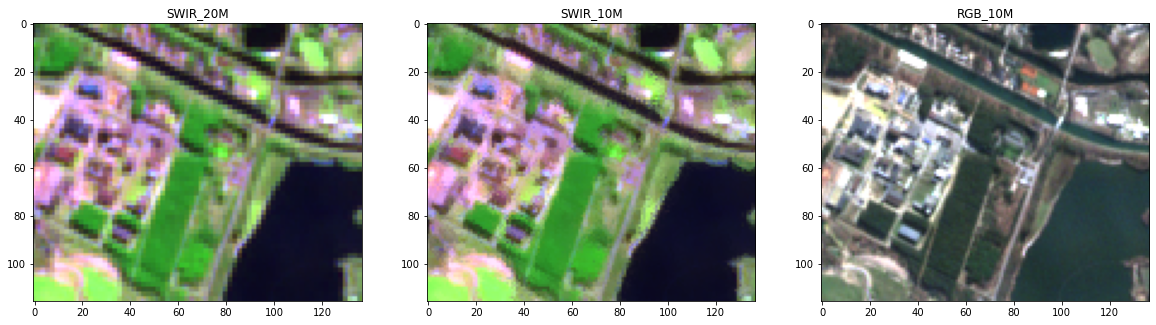

In [22]:

fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,20))

ax1.imshow(swir_data,vmin=0,vmax=1)
ax1.set_title('SWIR_20M')

ax2.imshow(swir_data_hr,vmin=0,vmax=1)
ax2.set_title('SWIR_10M')

ax3.imshow(rgb_data,vmin=0,vmax=1)
ax3.set_title('RGB_10M')


---

## Comparison of Sigma0 backscatter computed with different processing chains: SentinelHub, ORFEO, SNAP

In [26]:
backend_url = "https://openeo.creo.vito.be"
creo_conn = openeo.connect(backend_url).authenticate_basic()

In [23]:
W, S = 510000, 5680000
bbox = {
    "west": W, "east": W + 32 * 10,
    "south": S, "north": S + 32 * 10,
    "crs": 32631
}

dates = ("2020-05-06T00:00:00", "2020-09-30T00:00:00")

In [19]:
def backscatter(connection):
    return (connection.load_collection("SENTINEL1_GRD")
    .filter_bbox(**bbox)
    .filter_temporal(dates)
    .filter_bands(["VH", "VV"])
    .sar_backscatter(coefficient="sigma0-ellipsoid")
    .apply(lambda x: 10 * x.log(base=10)))


In [ ]:
%%time
backscatter(creo_conn).download("../data/US3/creo-series.nc", format="NetCDF")

In [20]:
%%time
backscatter(con).download("../data/US3/shub-series.nc", format="NetCDF")

CPU times: user 96 ms, sys: 88 ms, total: 184 ms
Wall time: 41.8 s


In [ ]:
%%time
# Ascending orbit data:
asc = (con.load_collection("S1_GRD_SIGMA0_ASCENDING").filter_bbox(**bbox)
    .filter_temporal(dates)
    .filter_bands(["VH", "VV"]))
# Descending orbit data:
desc = (con.load_collection("S1_GRD_SIGMA0_DESCENDING").filter_bbox(**bbox)
    .filter_temporal(dates)
    .filter_bands(["VH", "VV"]))
# Datacubes merging:
desc.merge_cubes(asc,overlap_resolver="max").apply(lambda x: 10 * x.log(base=10)).download("../data/US3/snap-series.nc", format="NetCDF") 

In [23]:
creo_ts = xr.open_dataset("../data/US3/creo-series.nc",engine="h5netcdf").rename({"VV": "VV_ORFEO", "VH":"VH_ORFEO"})
shub_ts = xr.open_dataset("../data/US3/shub-series.nc",engine="h5netcdf").rename({"VV": "VV_SHUB", "VH":"VH_SHUB"})
snap_ts = xr.open_dataset("../data/US3/snap-series.nc",engine="h5netcdf").rename({"VV": "VV_SNAP", "VH":"VH_SNAP"})

In [24]:
data_to_plot = xr.merge([creo_ts, shub_ts, snap_ts]).mean(dim=['x','y'])
data_to_plot.hvplot(dynamic=False,width=1250,height=600, grid=True, alpha=0.3, ylabel = 'dB') * data_to_plot.hvplot.scatter()

:Overlay
   .NdOverlay.I  :NdOverlay   [Variable]
      :Curve   [t]   (value)
   .NdOverlay.II :NdOverlay   [Variable]
      :Scatter   [t]   (value)